# Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the files

In [2]:
df1=pd.read_csv("https://www.dropbox.com/s/p2ef992kl2jmmis/matrix_1kg.txt?dl=1", sep='\t')

In [3]:
df1

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
type(df1)

pandas.core.frame.DataFrame

# Create the first subset with just sample data

In [5]:
subset1=df1.iloc[:,4:]
subset1


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Calculate the alternate allele fequency

In [6]:
alt_freq=subset1.mean(axis=1)
alt_freq

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

In [7]:
alt_freq2=alt_freq/2
alt_freq

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

# Create the histogram plot of the alternate allele freq.

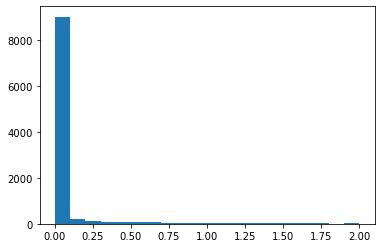

In [8]:
fig, ax = plt.subplots()
ax.hist(alt_freq, bins=20)
plt.show()

In [9]:
type(alt_freq)

pandas.core.series.Series

# Subset the data again for allele freq between 0.05-0.95

In [10]:
subset2=alt_freq.between(0.05,0.95)
subset2

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Length: 10000, dtype: bool

In [11]:
subset3=df1.loc[subset2,:]
subset3

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
37,chr21,28821553,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,chr21,18393571,A,G,0,1,0,0,0,1,...,0,0,0,1,1,2,0,1,1,1
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9980,chr21,30950713,A,C,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Subset the data to just display the samples

In [12]:
subset4=subset3.iloc[:,4:]
subset4

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,1,2,0,1,1,1
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Switch the row/columns, Transpose

In [13]:
subset_Transpose=subset4.T
subset_Transpose

,20,37,38,41,46,54,57,66,77,93,...,9888,9894,9904,9908,9913,9927,9959,9974,9980,9998
HG00096,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
HG00097,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
HG00099,1,0,2,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
HG00100,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
HG00101,0,0,1,0,0,2,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
NA21141,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
NA21142,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
NA21143,0,0,0,0,0,2,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0


In [14]:
subset_Transpose.mean(axis=0)

20      0.160518
37      0.061224
38      0.811224
41      0.188776
46      0.195055
          ...   
9927    0.654631
9959    0.231947
9974    0.361460
9980    0.155416
9998    0.057692
Length: 995, dtype: float64

In [15]:
subset_Transpose.var(axis=0)

20      0.150510
37      0.065351
38      0.525402
41      0.193247
46      0.187694
          ...   
9927    0.470387
9959    0.213553
9974    0.320414
9980    0.180783
9998    0.058311
Length: 995, dtype: float64

In [16]:
subset_input_standardized= StandardScaler().fit_transform(subset_Transpose)
subset_input_standardized

array([[-0.41383472, -0.23954346, -1.11938741, ..., -0.63868904,
        -0.36559627, -0.23896059],
       [ 2.16428478, -0.23954346,  0.26048638, ...,  1.12828128,
        -0.36559627, -0.23896059],
       [ 2.16428478, -0.23954346,  1.64036017, ...,  1.12828128,
        -0.36559627, -0.23896059],
       ...,
       [-0.41383472, -0.23954346,  1.64036017, ..., -0.63868904,
        -0.36559627, -0.23896059],
       [-0.41383472, -0.23954346, -1.11938741, ..., -0.63868904,
        -0.36559627, -0.23896059],
       [-0.41383472, -0.23954346,  0.26048638, ..., -0.63868904,
        -0.36559627, -0.23896059]])

In [17]:
subset_input_standardized.mean(axis=0)

array([-1.56424673e-16, -1.01172777e-15,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  2.28942105e-15,  5.70536118e-16,
        1.65749152e-16,  2.45835098e-16,  2.91847481e-16, -1.71966924e-15,
        3.19036616e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  5.13979231e-16,  1.90010226e-15,
        3.07794955e-16,  1.41814870e-15,  2.18210240e-16,  1.21828241e-16,
       -2.11726677e-15, -3.32805473e-16, -1.36189682e-15, -3.84264398e-16,
        1.92110413e-16,  2.84091606e-16, -3.47184343e-16,  2.08206032e-15,
       -4.99861795e-16, -1.89713934e-15, -4.65701087e-16, -1.42045803e-16,
       -8.84583702e-16,  2.96379004e-16,  3.13546503e-16, -2.23621923e-15,
       -6.62038016e-16,  2.15839905e-15, -1.99674570e-15, -2.44266494e-16,
       -5.92017278e-16,  1.59069513e-15, -3.25398177e-16, -9.36957646e-16,
       -7.13496940e-16,  3.40866355e-16,  1.24965449e-16,  2.07622163e-17,
        4.61518143e-16, -

In [18]:
subset_input_standardized.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Start the PCA analysis

In [19]:
pca=PCA(n_components= 5)
pca_output=pca.fit_transform(subset_input_standardized)
pca_output

array([[-6.62155502e+00, -9.01305087e+00, -1.29097216e-01,
        -4.71531326e+00,  5.92262148e-03],
       [-6.25245932e+00, -8.48463339e+00,  1.97187848e+00,
        -3.42364088e+00, -1.50018436e+00],
       [-6.20196351e+00, -7.49404145e+00,  3.06555885e-01,
        -4.84485191e+00, -2.98123282e-01],
       ...,
       [-4.66857746e+00, -2.81535338e+00, -2.91510433e+00,
         3.30435924e+00, -3.74905352e-01],
       [-6.38786618e+00, -2.88337646e+00, -4.37286068e+00,
         3.20616436e+00,  2.82323310e+00],
       [-5.15728886e+00, -2.69049790e-01, -5.85997994e+00,
         6.65070870e+00,  2.23268810e+00]])

In [20]:
pca_output.shape

(2548, 5)

In [21]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5
0,-6.621555,-9.013051,-0.129097,-4.715313,0.005923
1,-6.252459,-8.484633,1.971878,-3.423641,-1.500184
2,-6.201964,-7.494041,0.306556,-4.844852,-0.298123
3,-5.065617,-5.671574,1.864214,-3.448731,-2.262608
4,-6.760246,-8.923754,2.376141,-2.826445,2.375201
...,...,...,...,...,...
2543,-6.466132,0.340685,-2.581258,4.261332,0.789683
2544,-6.594330,-2.616532,-5.130563,3.105596,-2.091400
2545,-4.668577,-2.815353,-2.915104,3.304359,-0.374905
2546,-6.387866,-2.883376,-4.372861,3.206164,2.823233


# Create the PCA plot

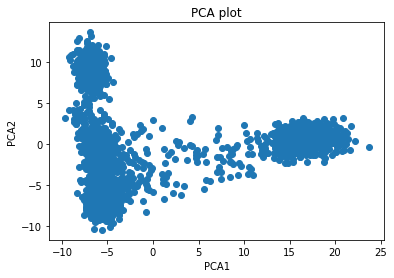

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title('PCA plot')
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
plt.show()